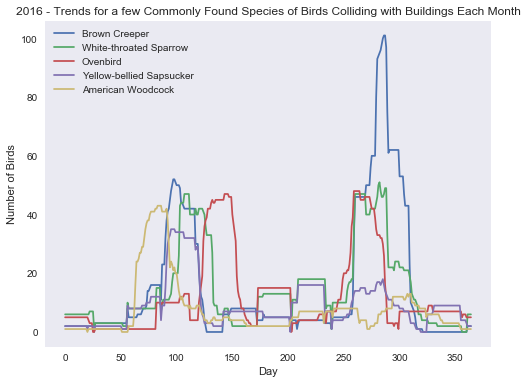

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline
pd.options.mode.chained_assignment = None;

def strip(s):
    return s.strip();

bird_data = pd.read_csv('data/2016_CBCM_birds_willowbrook.csv', parse_dates = [2])
bird_data["Bird Species"] = bird_data["Bird Species"].apply(strip)

collision_values = ["Collision - building", "Collision - window", "Collision - car", "Collision - other"]
collision_mask = bird_data.isin(collision_values)["Injury Cause"]
collision_data = bird_data[collision_mask]

common_species = ["Brown Creeper", "White-throated Sparrow", "Ovenbird", "Yellow-bellied Sapsucker", "American Woodcock"]

daily_counts = pd.DataFrame(data = {'day': list(range(365))})

x = 0;
for species in common_species:
    daily_counts[species] = np.zeros(365)
    species_data = collision_data[collision_data.isin([species])["Bird Species"]]
    species_counts = species_data['Chart Number'].groupby(species_data["Admission Date"].dt.dayofyear).count()
    for day, c in species_counts.iteritems():
        daily_counts[species][day] = c

fig, ax = plt.subplots(figsize=(8, 6))

week_frequencies = pd.DataFrame(data = {'day': list(range(365))})

def access_row_with_modular_boundaries(index, iterable):
    if index >= iterable.size:
        index -= iterable.size
    if index < 0:
        index = iterable.size + index
    return iterable[index]

def sum_over_month(day):
    total = 0;
    for d in list(range(-15, 15)):
        total += access_row_with_modular_boundaries(day + d, daily_counts[species])
    return total
        
for species in common_species:
    frequency_column = []
    for day in list(range(365)):
        birds_per_month = sum_over_month(day)
        frequency_column.append(birds_per_month)
    week_frequencies[species] = frequency_column
    
for species in common_species:
    ax.plot(week_frequencies['day'], week_frequencies[species])

ax.set(xlabel='Day', 
       ylabel='Number of Birds',
       title='2016 - Trends for a few Commonly Found Species of Birds Colliding with Buildings Each Month')

plt.legend(common_species, loc='best')

ax.grid()

plt.show()